In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/car.csv")

In [3]:
df.head()

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
0,148468232,108616925,1693378633111,1980,Jeep,A2,Mỹ,SUV / Cross over,4.0,MT,petrol,green,40000,380000000.0,used
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
4,149530234,109517456,1693313503000,2001,Fiat,Siena,NaN,NaN,NaN,MT,petrol,white,200000,73000000.0,used


In [4]:
df.shape

(317636, 15)

In [5]:
df.drop(["id", "list_id", "list_time"], axis=1, inplace=True)

In [6]:
df.columns

Index(['manufacture_date', 'brand', 'model', 'origin', 'type', 'seats',
       'gearbox', 'fuel', 'color', 'mileage_v2', 'price', 'condition'],
      dtype='object')

In [7]:
brand_dis = df.brand.value_counts(dropna=False, normalize=True).cumsum()

In [8]:
brand_dis[brand_dis >= 0.9].index[0]

'Nissan'

In [9]:
brands = brand_dis[brand_dis <= 0.9].index.to_list()
brands

['Toyota',
 'Ford',
 'Hyundai',
 'Kia',
 'Mitsubishi',
 'Mercedes Benz',
 'Mazda',
 'Honda',
 'Chevrolet',
 'Vinfast',
 'Suzuki',
 'BMW']

In [10]:
brands.append('Nissan')

In [11]:
df = df[df.brand.isin(brands)]

In [12]:
df.shape

(287954, 12)

In [13]:
df.isna().sum()

manufacture_date        0
brand                   0
model                   0
origin              76112
type                38231
seats               28690
gearbox              1371
fuel                   44
color               87349
mileage_v2              0
price                 112
condition               0
dtype: int64

In [14]:
df.dropna(subset=["price"], inplace=True)

In [15]:
df.isna().sum()

manufacture_date        0
brand                   0
model                   0
origin              76099
type                38209
seats               28679
gearbox              1371
fuel                   44
color               87300
mileage_v2              0
price                   0
condition               0
dtype: int64

In [16]:
df.nunique(dropna=False)

manufacture_date      43
brand                 13
model                329
origin                11
type                  10
seats                 12
gearbox                5
fuel                   5
color                 13
mileage_v2          2995
price               1881
condition              2
dtype: int64

In [17]:
df.manufacture_date.unique()

array([2021, 2016, 2020, 2022, 2018, 2009, 2015, 2008, 2023, 2007, 2004,
       2019, 2014, 2010, 2012, 2003, 2011, 2017, 2006, 1999, 2013, 1994,
       1992, 2000, 2002, 1996, 2005, 1998, 1995, 2001, 1997, 1986, 1990,
       1985, 1989, 1984, 1980, 1993, 1988, 1991, 1987, 1983, 1982],
      dtype=int64)

In [18]:
df.origin.unique()

array(['Nhật Bản', 'Hàn Quốc', 'Việt Nam', 'Nước khác', nan, 'Đức',
       'Ấn Độ', 'Thái Lan', 'Đài Loan', 'Mỹ', 'Trung Quốc'], dtype=object)

In [19]:
df.type.unique()

array(['Sedan', nan, 'SUV / Cross over', 'Minivan (MPV)', 'Van',
       'Hatchback', 'Pick-up (bán tải)', 'Coupe (2 cửa)',
       'Kiểu dáng khác', 'Mui trần'], dtype=object)

In [20]:
df.seats.unique()

array([ 5., nan,  8.,  7.,  4., 16.,  9.,  2.,  6., -1., 12., 10.])

In [21]:
df.gearbox.unique()

array(['AT', 'MT', 'AMT', nan, 'unknown'], dtype=object)

In [22]:
df.fuel.unique()

array(['petrol', 'oil', 'electric', 'hybrid', nan], dtype=object)

In [23]:
df.color.unique()

array(['white', nan, 'black', 'grey', 'others', 'green', 'gold', 'silver',
       'blue', 'red', 'orange', 'pink', 'brown'], dtype=object)

In [24]:
df[df.mileage_v2 <= 0].mileage_v2.unique()

array([0], dtype=int64)

In [25]:
df.groupby("brand").model.nunique().sum()

343

In [26]:
df.duplicated().sum()

249631

In [27]:
used_df = df[df.condition == 'used']
used_df.shape

(245442, 12)

In [28]:
new_df = df[df.condition == 'new']
new_df.shape

(42400, 12)

In [29]:
df['Z-Score'] = (df['price'] - df['price'].mean()) / df['price'].std()

In [30]:
df = df[np.abs(df['Z-Score']) <= 3]

In [31]:
df.shape

(283895, 13)

In [32]:
df[df.condition == 'used'].nunique()

manufacture_date      43
brand                 13
model                318
origin                10
type                   9
seats                 11
gearbox                4
fuel                   4
color                 12
mileage_v2          2978
price               1504
condition              1
Z-Score             1504
dtype: int64

In [33]:
df.isna().sum()

manufacture_date        0
brand                   0
model                   0
origin              75526
type                37627
seats               28185
gearbox              1371
fuel                   44
color               86443
mileage_v2              0
price                   0
condition               0
Z-Score                 0
dtype: int64

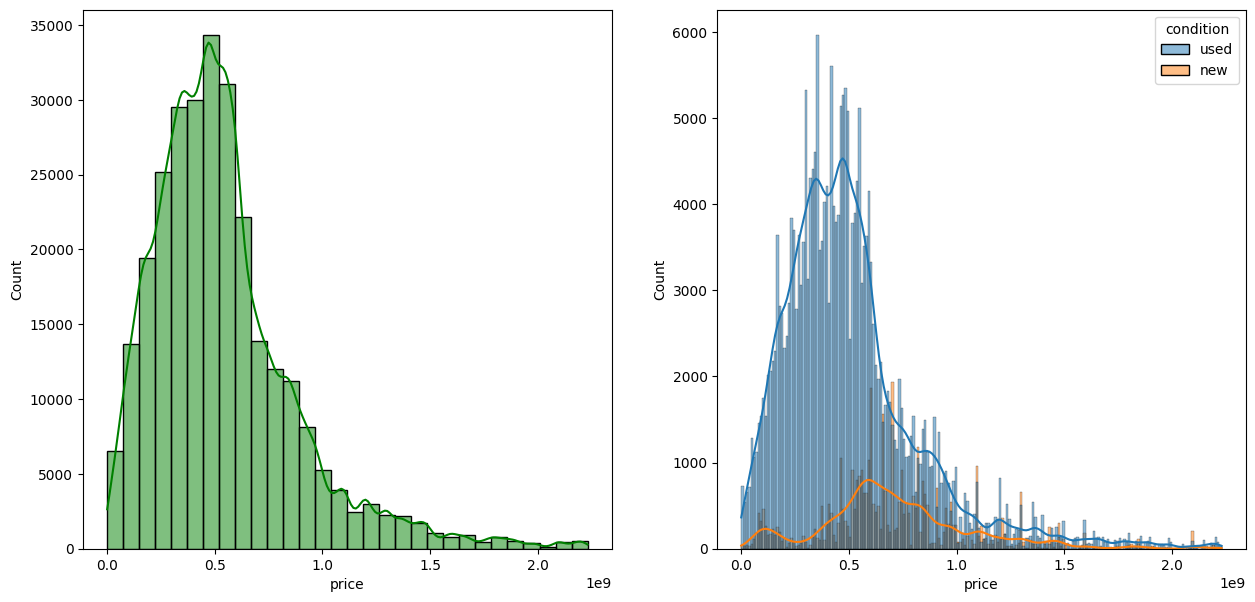

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='condition')
plt.show()

In [36]:
df.mileage_v2.min(), df.mileage_v2.max()

(0, 999999)

In [35]:
df.price.min(), df.price.max()

(1310720.0, 2230000000.0)

In [37]:
df["brand_model"] = df["brand"] + " " + df["model"]

In [42]:
for brand in df.brand.unique():
    print(brand)
    print(df[df.brand == brand].model.unique())

Honda
['City' 'Civic' 'CR V' 'Accord' 'Brio' 'HR-V' 'Jazz' 'Dòng khác' 'BR-V'
 'Odyssey' 'Pilot' 'CR X' 'Legend' 'Vigor' 'NSX']
Kia
['Rio' 'Morning' 'Soluto' 'K3' 'Cerato' 'Forte' 'Dòng khác' 'Rondo'
 'Carnival' 'Spectra' 'Seltos' 'Sorento' 'Magentis' 'Carens' 'K5' 'CD5'
 'Sedona' 'Sonet' 'Pride' 'Optima' 'Sportage' 'Picanto' 'Quoris'
 'Cerato Koup' 'Potentia' 'Soul' 'Sephia' 'Cadenza' 'Enterprise' 'Pregio'
 'Concord']
Toyota
['Vios' 'Innova' 'Camry' 'Corolla Altis' 'Avanza' 'Wigo' 'Fortuner'
 'Veloz' 'Zace' 'Veloz Cross' 'Corolla Cross' 'Yaris' 'Raize' 'Cressida'
 'Innova Cross' 'Hilux' 'Rush' 'Venza' 'Hiace' 'Land Cruiser' 'Corolla'
 'Dòng khác' 'Liteace' 'Celica' 'Sienna' 'Corona' 'RAV4' 'Tercel'
 'Century' 'Prado' 'Previa' 'Land Cruiser Prado' 'Avalon' 'Prius'
 'Highlander' 'Solara' '4 Runner' 'Crown' '86' 'Aygo' 'Wish' 'IQ' 'Aristo'
 'Fj cruiser' 'Yaris Verso' 'Tundra' 'Sequoia' 'Vista' 'Caldina' 'Alphard'
 'Aurion' 'Cami']
Hyundai
['Elantra' 'Grand i10' 'Dòng khác' 'Accent' 'Cret